Лабораторна робота 2

Варіант 28

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


## Завдання 1: Аналіз ВВП країн (Номінальний)

ПОМИЛКА ВИКОНАННЯ ЗАВДАННЯ 1: HTTP Error 403: Forbidden
Не вдалося завантажити дані з Wikipedia. Перейдіть до Завдання 2.


## Завдання 2: Аналіз датасету Титанік

1. Перші 5 рядків:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   

/tmp/ipython-input-1145071632.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_t['Age'].fillna(df_t['Age'].mean(), inplace=True)
/tmp/ipython-input-1145071632.py:136: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

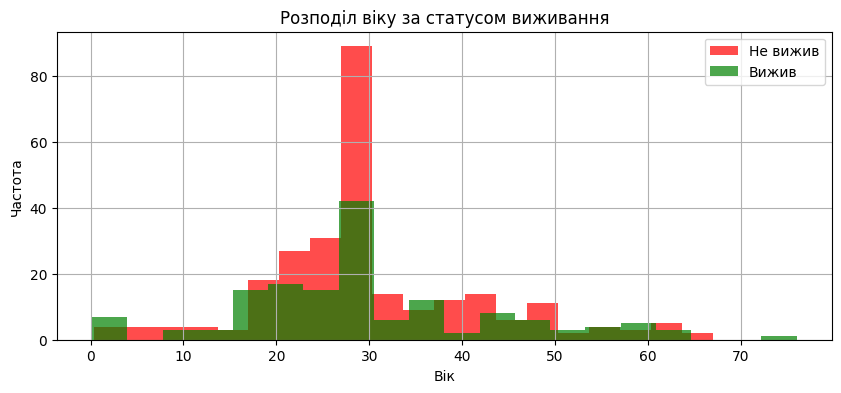


21. Відсоток виживання за комбінацією статі та класу:
 Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

22. Матриця кореляції числових змінних:
           Survived  Pclass     Sex     Age    Fare
Survived    1.0000 -0.1086  1.0000 -0.0000  0.1914
Pclass     -0.1086  1.0000 -0.1086 -0.4408 -0.5766
Sex         1.0000 -0.1086  1.0000 -0.0000  0.1914
Age        -0.0000 -0.4408 -0.0000  1.0000  0.3268
Fare        0.1914 -0.5766  0.1914  0.3268  1.0000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# ЗАВДАННЯ 1: АНАЛІЗ ДАТАСЕТУ ВВП КРАЇН (НОМІНАЛЬНИЙ)


print("## Завдання 1: Аналіз ВВП країн (Номінальний)")
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

try:

    tables = pd.read_html(url)
    df = tables[0]


    df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns.values]
    df.columns = df.columns.str.replace(' ', '_').str.replace(r'\[.*\]', '', regex=True)


    df_gdp = df.iloc[:, [1, 2, 3, 4]].copy()
    df_gdp.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

    print("\n1. Перші 5 рядків:")
    print(df_gdp.head())
    print("\n2. Розмір датасету:", df_gdp.shape)


    print("\n5. Типи даних до перетворення:")
    print(df_gdp.dtypes)


    cols_to_convert = ['MVF_2024', 'WorldBank_2023', 'OON_2022']

    for col in cols_to_convert:

        df_gdp[col] = df_gdp[col].astype(str).str.replace(r'\[.*\]', '', regex=True).str.replace('-', np.nan).str.replace(',', '', regex=False)
        df_gdp[col] = pd.to_numeric(df_gdp[col], errors='coerce')


    print("\n6. Наявність пропущених значень до обробки:\n", df_gdp[cols_to_convert].isnull().sum())
    for col in cols_to_convert:
        mean_val = df_gdp[col].mean()
        df_gdp[col].fillna(mean_val, inplace=True)


    print("\n7. Наявність пропущених значень після обробки:\n", df_gdp[cols_to_convert].isnull().sum())


    print("\n8. Кількість дублікатів:", df_gdp.duplicated().sum())
    df_gdp.drop_duplicates(inplace=True)


    print("\n9. Описова статистика датасету:\n", df_gdp.describe())


    df_gdp['MVF_WB_Diff'] = abs(df_gdp['MVF_2024'] - df_gdp['WorldBank_2023'])
    max_diff_country = df_gdp.loc[df_gdp['MVF_WB_Diff'].idxmax()]
    print("\n10. Країна з найбільшим відхиленням MVF_2024 та WorldBank_2023:\n", max_diff_country[['Country', 'MVF_WB_Diff']])


    correlation_matrix = df_gdp[cols_to_convert].corr()
    print("\n11. Матриця кореляції ВВП показників:\n", correlation_matrix.round(4))


    mean_gdp = df_gdp[cols_to_convert].mean()
    print("\n12. Середнє значення ВВП за роками:\n", mean_gdp.round(2))


    df_gdp['Std_Dev'] = df_gdp[cols_to_convert].std(axis=1)
    max_std_dev_country = df_gdp.loc[df_gdp['Std_Dev'].idxmax()]
    print("\n13. Країна з найвищою варіативністю у показниках:\n", max_std_dev_country[['Country', 'Std_Dev']])


    max_gdp = df_gdp[cols_to_convert].idxmax().apply(lambda x: df_gdp.loc[x, 'Country'])
    min_gdp = df_gdp[cols_to_convert].idxmin().apply(lambda x: df_gdp.loc[x, 'Country'])
    print("\n14. Країни з найвищим показником ВВП:\n", max_gdp)
    print("Країни з найнижчим показником ВВП:\n", min_gdp)


    plt.figure(figsize=(8, 5))
    df_gdp['MVF_2024'].hist(bins=30)
    plt.title('Розподіл показників MVF_2024')
    plt.xlabel('ВВП (млн. дол. США)')
    plt.ylabel('Кількість країн')
    plt.show()


    total_gdp = df_gdp[cols_to_convert].sum()
    shares = df_gdp[cols_to_convert] / total_gdp * 100
    print("\n16. Частки (перші 5 рядків):\n", shares.head().round(4))


    top_countries = df_gdp.sort_values('MVF_2024', ascending=False).head(5)['Country']
    df_plot = df_gdp[df_gdp['Country'].isin(top_countries)].set_index('Country')[cols_to_convert].T

    plt.figure(figsize=(10, 6))
    df_plot.plot(kind='line', ax=plt.gca(), marker='o')
    plt.title('Зміни ВВП для Топ-5 країн (2022-2024)')
    plt.xlabel('Рік')
    plt.ylabel('ВВП (млн. дол. США)')
    plt.legend(title='Країна', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"\nПОМИЛКА ВИКОНАННЯ ЗАВДАННЯ 1: {e}")
    print("Не вдалося завантажити дані з Wikipedia. Перейдіть до Завдання 2.")


# ЗАВДАННЯ 2: АНАЛІЗ ДАТАСЕТУ ТИТАНІК


print("\n\n## Завдання 2: Аналіз датасету Титанік")
file_name = "titanic.csv"
df_t = pd.read_csv(file_name)


print("\n1. Перші 5 рядків:")
print(df_t.head())


print("\n2. Розмір датасету (рядки, стовпці):", df_t.shape)


print("\n3. Типи даних:")
print(df_t.info())


df_t['Age'].fillna(df_t['Age'].mean(), inplace=True)
df_t['Fare'].fillna(df_t['Fare'].mean(), inplace=True)

df_t['Embarked'].fillna(df_t['Embarked'].mode()[0], inplace=True)


print("\n5. Пропущені значення після обробки (Age, Fare, Embarked):\n", df_t.isnull().sum())


print("\n6. Кількість дублікатів:", df_t.duplicated().sum())
df_t.drop_duplicates(inplace=True)


print("\n7. Описова статистика:\n", df_t.describe())


df_t.drop('Cabin', axis=1, inplace=True)


df_analysis = df_t[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()


df_analysis['Sex'] = df_analysis['Sex'].map({'female': 1, 'male': 0})


print("\n11. Пропущені значення у фінальному датасеті:\n", df_analysis.isnull().sum())


print("\n12. Перші 5 рядків фінального датасету:\n", df_analysis.head())
print("\n13. Останні 5 рядків фінального датасету:\n", df_analysis.tail())


survival_by_sex = df_analysis.groupby('Sex')['Survived'].mean() * 100
print("\n14. Відсоток виживання за статтю (1=жінка, 0=чоловік):\n", survival_by_sex.round(2))


survival_by_pclass = df_analysis.groupby('Pclass')['Survived'].mean() * 100
print("\n15. Відсоток виживання за класом (Pclass):\n", survival_by_pclass.round(2))


avg_age_survival = df_analysis.groupby('Survived')['Age'].mean()
print("\n16. Середній вік за виживанням:\n", avg_age_survival.round(2))


df_analysis['Fare_Group'] = pd.qcut(df_analysis['Fare'], 4, labels=['Q1_Low', 'Q2_Medium', 'Q3_High', 'Q4_Very_High'])
survival_by_fare = df_analysis.groupby('Fare_Group')['Survived'].mean() * 100
print("\n17. Відсоток виживання за групами тарифів:\n", survival_by_fare.round(2))


avg_fare_by_pclass = df_analysis.groupby('Pclass')['Fare'].mean()
print("\n18. Середній тариф для кожного класу:\n", avg_fare_by_pclass.round(2))


avg_age_by_pclass = df_analysis.groupby('Pclass')['Age'].mean()
print("\n19. Середній вік пасажирів для кожного класу:\n", avg_age_by_pclass.round(2))


plt.figure(figsize=(10, 4))
df_analysis[df_analysis['Survived'] == 0]['Age'].hist(bins=20, color='red', alpha=0.7, label='Не вижив')
df_analysis[df_analysis['Survived'] == 1]['Age'].hist(bins=20, color='green', alpha=0.7, label='Вижив')
plt.title('Розподіл віку за статусом виживання')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend()
plt.show()
#


survival_by_sex_pclass = df_analysis.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\n21. Відсоток виживання за комбінацією статі та класу:\n", survival_by_sex_pclass.round(2))


correlation_matrix_t = df_analysis[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].corr()
print("\n22. Матриця кореляції числових змінних:\n", correlation_matrix_t.round(4))